_Lambda School Data Science, Unit 2_
 
# Regression & Classification Sprint Challenge

To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

You are permitted and encouraged to do as much data exploration as you want.

### Part 1, Classification
- 1.1. Begin with baselines for classification
- 1.2. Do train/test split. Arrange data into X features matrix and y target vector
- 1.3. Use scikit-learn to fit a logistic regression model
- 1.4. Report classification metric: accuracy

### Part 2, Regression
- 2.1. Begin with baselines for regression
- 2.2. Do train/validate/test split. 
- 2.3. Arrange data into X features matrix and y target vector
- 2.4. Do one-hot encoding
- 2.5. Use scikit-learn to fit a linear regression (or ridge regression) model
- 2.6. Report validation MAE and $R^2$

### Stretch Goals, Regression
- Make visualizations to explore relationships between features and target
- Try at least 3 feature combinations. You may select features manually, or automatically
- Report validation MAE and $R^2$ for each feature combination you try
- Report test MAE and $R^2$ for your final model
- Print or plot the coefficients for the features in your model

In [1]:
# If you're in Colab...
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

# Part 1, Classification: Predict Blood Donations 🚑
Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive.

The goal is to predict whether the donor made a donation in March 2007, using information about each donor's history.

Good data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need.

In [2]:
import pandas as pd

donors = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')
assert donors.shape == (748,5)

donors = donors.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

## 1.1. Begin with baselines

What accuracy score would you get here with a "majority class baseline"?
 
(You don't need to split the data into train and test sets yet. You can answer this question either with a scikit-learn function or with a pandas function.)

In [3]:
donors.made_donation_in_march_2007.value_counts(normalize=True) #76%

0    0.762032
1    0.237968
Name: made_donation_in_march_2007, dtype: float64

## 1.2. Do train/test split. Arrange data into X features matrix and y target vector

Do these steps in either order.

Split randomly. Use scikit-learn's train/test split function. Include 75% of the data in the train set, and hold out 25% for the test set.

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
train, test = train_test_split(donors)
train.shape, test.shape

((561, 5), (187, 5))

## 1.3. Use scikit-learn to fit a logistic regression model

You may use any number of features

In [6]:
train.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
263,2,3,750,38,1
113,4,8,2000,40,1
402,23,8,2000,46,0
611,4,1,250,4,0
285,11,2,500,14,0


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
xtrain=train.drop(columns='made_donation_in_march_2007')
xtest=test.drop(columns='made_donation_in_march_2007')
ytrain=train.made_donation_in_march_2007
ytest=test.made_donation_in_march_2007

model=LogisticRegressionCV(n_jobs=-1, cv=5, multi_class='auto')

model.fit(xtrain, ytrain)
print("Validation Accuracy", model.score(xtest,ytest))

Validation Accuracy 0.7807486631016043


## 1.4. Report classification metric: accuracy

What is your model's accuracy on the test set?

Don't worry if your model doesn't beat the mean baseline. That's okay!

_"The combination of some data and an aching desire for an answer does not ensure that a reasonable answer can be extracted from a given body of data."_ —[John Tukey](https://en.wikiquote.org/wiki/John_Tukey)



In [8]:
#see above

# Part 2, Regression: Predict home prices in Ames, Iowa 🏠

You'll use historical housing data. There's a data dictionary at the bottom of the notebook. 

Run this code cell to load the dataset:





In [9]:
import pandas as pd
URL = 'https://drive.google.com/uc?export=download&id=1522WlEW6HFss36roD_Cd9nybqSuiVcCK'
homes = pd.read_csv(URL)
assert homes.shape == (2904, 47)

## 2.1. Begin with baselines

What is the Mean Absolute Error and R^2 score for a mean baseline?

In [10]:
homes.head()

,1st_Flr_SF,Bedroom_AbvGr,Bldg_Type,Bsmt_Full_Bath,Bsmt_Half_Bath,Central_Air,Condition_1,Condition_2,Electrical,Exter_Cond,...,Roof_Style,SalePrice,Sale_Condition,Sale_Type,Street,TotRms_AbvGrd,Utilities,Year_Built,Year_Remod/Add,Yr_Sold
0,1656,3,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,...,Hip,215000,Normal,WD,Pave,7,AllPub,1960,1960,2010
1,896,2,1Fam,0.0,0.0,Y,Feedr,Norm,SBrkr,TA,...,Gable,105000,Normal,WD,Pave,5,AllPub,1961,1961,2010
2,1329,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,Hip,172000,Normal,WD,Pave,6,AllPub,1958,1958,2010
3,2110,3,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,...,Hip,244000,Normal,WD,Pave,8,AllPub,1968,1968,2010
4,928,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,Gable,189900,Normal,WD,Pave,6,AllPub,1997,1998,2010


In [11]:
ypred=[homes.SalePrice.mean()]*len(homes.SalePrice)
homes['ypred']=ypred
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(homes.SalePrice, homes.ypred )
r2=r2_score(homes.SalePrice, homes.ypred)
print(f'R^2 score {r2}')
print(f'MAE: {mae}')

R^2 score 0.0
MAE: 58149.92774120811


## 2.2. Do train/test split

Train on houses sold in the years 2006 - 2008. (1,920 rows)

Validate on house sold in 2009. (644 rows)

Test on houses sold in 2010. (340 rows)

In [12]:
train=homes[homes.Yr_Sold<2009]
validate=homes[homes.Yr_Sold==2009]
test=homes[homes.Yr_Sold==2010]

In [13]:
train.head()

,1st_Flr_SF,Bedroom_AbvGr,Bldg_Type,Bsmt_Full_Bath,Bsmt_Half_Bath,Central_Air,Condition_1,Condition_2,Electrical,Exter_Cond,...,SalePrice,Sale_Condition,Sale_Type,Street,TotRms_AbvGrd,Utilities,Year_Built,Year_Remod/Add,Yr_Sold,ypred
984,1414,3,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,...,176500,Normal,WD,Pave,6,AllPub,1958,2002,2008,180383.689738
985,2117,4,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,237500,Normal,WD,Pave,7,AllPub,1970,1970,2008,180383.689738
986,1092,4,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,206900,Normal,WD,Pave,9,AllPub,1969,1969,2008,180383.689738
987,926,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,187500,Normal,WD,Pave,7,AllPub,1997,1998,2008,180383.689738
988,680,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,...,165000,Normal,WD,Pave,7,AllPub,1995,1996,2008,180383.689738


## 2.3. Arrange data into X features matrix and y target vector

Select at least one numeric feature and at least one categorical feature.

Otherwise, you many choose whichever features and however many you want.

In [14]:
numeric_features=train.select_dtypes('number').drop(columns="SalePrice").drop(columns='ypred').columns
features=['1st_Flr_SF',
 'Bedroom_AbvGr',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Gr_Liv_Area',
 'Half_Bath',
 'Kitchen_AbvGr',
 'Lot_Area',
 'MS_SubClass',
 'Mo_Sold',
 'Overall_Cond',
 'Overall_Qual',
 'TotRms_AbvGrd',
 'Year_Built',
 'Year_Remod/Add',
 'Yr_Sold',
 'Bldg_Type',
 'Central_Air',
 'Condition_1',
 'Condition_2',
 'Electrical',
 'Exter_Cond',
 'Exter_Qual',
 'Exterior_1st',
 'Exterior_2nd',
 'Foundation',
 'Functional',
 'Heating',
 'Heating_QC',
 'House_Style',
 'Kitchen_Qual',
 'Land_Contour',
 'Land_Slope',
 'Lot_Config',
 'Lot_Shape',
 'MS_Zoning',
 'Mas_Vnr_Type',
 'Neighborhood',
 'Paved_Drive',
 'Roof_Matl',
 'Roof_Style',
 'Sale_Condition',
 'Sale_Type',
 'Street',
 'Utilities']
def getxandy(df):
    x=df[features]
    x.MS_SubClass=x.MS_SubClass.astype(str)
    x.Mo_Sold=x.Mo_Sold.astype(str)
    x=x.copy()
    y=df.SalePrice.copy()
    return x,y

trainx, trainy = getxandy(train)
validatex, validatey = getxandy(validate)
testx, testy = getxandy(test)

/home/jesse/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
numeric_features

Index(['1st_Flr_SF', 'Bedroom_AbvGr', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath',
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'MS_SubClass', 'Mo_Sold', 'Overall_Cond', 'Overall_Qual',
       'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add', 'Yr_Sold'],
      dtype='object')

## 2.4. Do one-hot encoding

Encode your categorical feature(s).

In [16]:
categorical=train.select_dtypes(exclude='number')
lowcardincat=[]
import seaborn as sns
import matplotlib.pyplot as plt
for col in sorted(categorical):
    if train[col].nunique()<=30:
        sns.catplot(x=col, y='SalePrice', data=train, kind='bar', color='blue')
        plt.show
        lowcardincat=lowcardincat+[col]
lowcardincat

/home/jesse/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


['Bldg_Type',
 'Central_Air',
 'Condition_1',
 'Condition_2',
 'Electrical',
 'Exter_Cond',
 'Exter_Qual',
 'Exterior_1st',
 'Exterior_2nd',
 'Foundation',
 'Functional',
 'Heating',
 'Heating_QC',
 'House_Style',
 'Kitchen_Qual',
 'Land_Contour',
 'Land_Slope',
 'Lot_Config',
 'Lot_Shape',
 'MS_Zoning',
 'Mas_Vnr_Type',
 'Neighborhood',
 'Paved_Drive',
 'Roof_Matl',
 'Roof_Style',
 'Sale_Condition',
 'Sale_Type',
 'Street',
 'Utilities']

In [17]:
features=list(numeric_features)+list(lowcardincat)
features

['1st_Flr_SF',
 'Bedroom_AbvGr',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Gr_Liv_Area',
 'Half_Bath',
 'Kitchen_AbvGr',
 'Lot_Area',
 'MS_SubClass',
 'Mo_Sold',
 'Overall_Cond',
 'Overall_Qual',
 'TotRms_AbvGrd',
 'Year_Built',
 'Year_Remod/Add',
 'Yr_Sold',
 'Bldg_Type',
 'Central_Air',
 'Condition_1',
 'Condition_2',
 'Electrical',
 'Exter_Cond',
 'Exter_Qual',
 'Exterior_1st',
 'Exterior_2nd',
 'Foundation',
 'Functional',
 'Heating',
 'Heating_QC',
 'House_Style',
 'Kitchen_Qual',
 'Land_Contour',
 'Land_Slope',
 'Lot_Config',
 'Lot_Shape',
 'MS_Zoning',
 'Mas_Vnr_Type',
 'Neighborhood',
 'Paved_Drive',
 'Roof_Matl',
 'Roof_Style',
 'Sale_Condition',
 'Sale_Type',
 'Street',
 'Utilities']

In [25]:
categorical.describe(exclude='number').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
Neighborhood,1920,28,NAmes,290
Exterior_1st,1920,16,VinylSd,656
Exterior_2nd,1920,16,VinylSd,652
Sale_Type,1920,10,WD,1637
Condition_1,1920,9,Norm,1659
Functional,1920,8,Typ,1793
House_Style,1920,8,1Story,956
Condition_2,1920,8,Norm,1897
Roof_Matl,1920,8,CompShg,1887
MS_Zoning,1920,7,RL,1485


In [19]:
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

encoder=ce.OneHotEncoder(use_cat_names=True)
xtrain_encoded=encoder.fit_transform(trainx)
xval_encoded=encoder.transform(validatex)


In [20]:
scaler=MinMaxScaler()
xtrainscaled=scaler.fit_transform(xtrain_encoded)
xvalscaled=scaler.transform(xval_encoded)

In [21]:
# model = LogisticRegressionCV(n_jobs=-1, cv=5, multi_class='auto') 
# model.fit(xtrainscaled, trainy) 
# print('Validation Accuracy', model.score(xvalscaled, validatey))

## 2.5. Use scikit-learn to fit a linear regression (or ridge regression) model
Fit your model.

In [22]:
from sklearn.linear_model import Ridge
model = Ridge(random_state=42)
model.fit(xtrainscaled, trainy) 
print(model.score(xvalscaled, validatey))
ypred=model.predict(xvalscaled)

0.8895050076031527


## 2.6. Report validation MAE and $R^2$

What is your model's Mean Absolute Error and $R^2$ score on the validation set?

In [23]:
mae=mean_absolute_error(validatey, ypred)
r2=r2_score(validatey,ypred)
print(f'R^2 score {r2}')
print(f'MAE: {mae}')

R^2 score 0.8895050076031527
MAE: 18139.75754050369


# Stretch Goals, Regression
- Make visualizations to explore relationships between features and target
- Try at least 3 feature combinations. You may select features manually, or automatically
- Report validation MAE and $R^2$ for each feature combination you try
- Report test MAE and $R^2$ for your final model
- Print or plot the coefficients for the features in your model

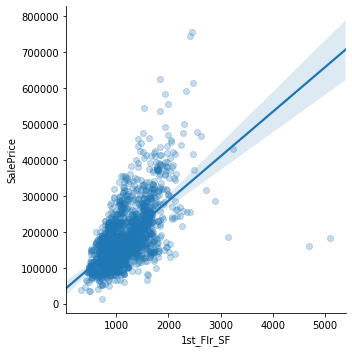

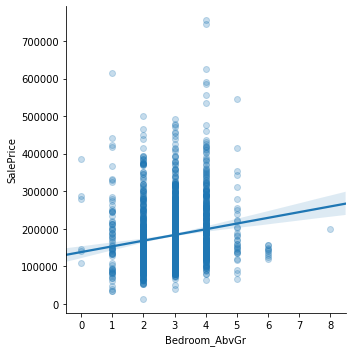

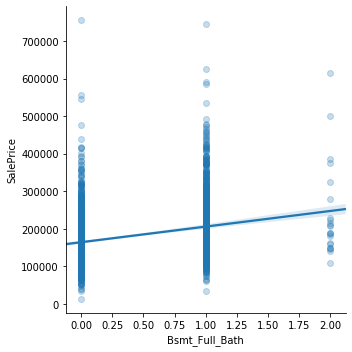

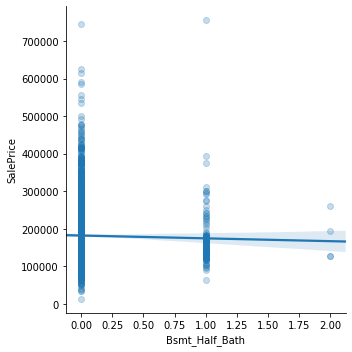

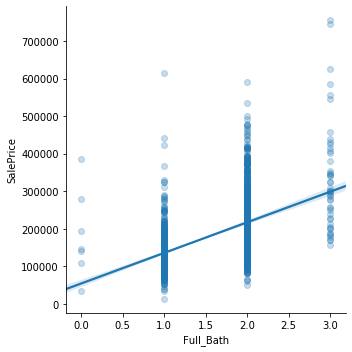

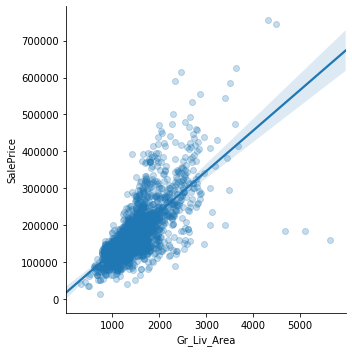

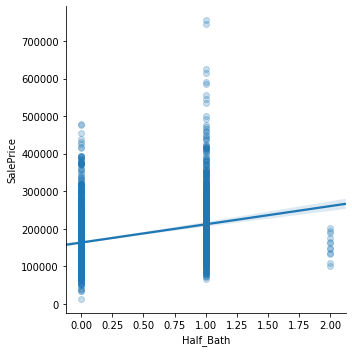

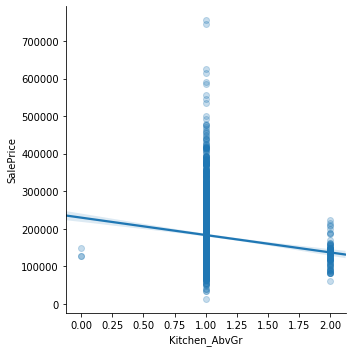

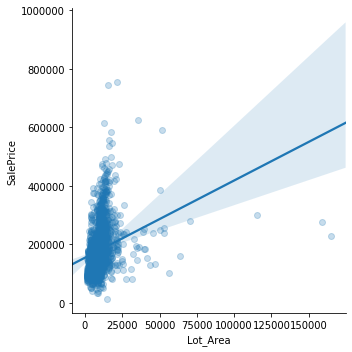

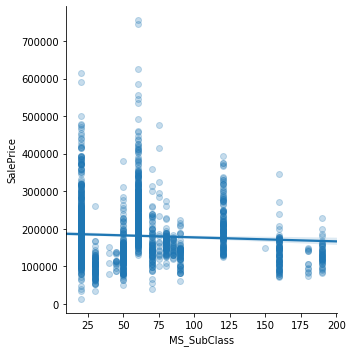

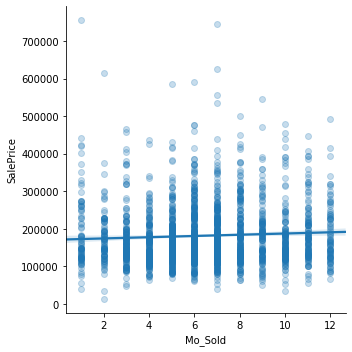

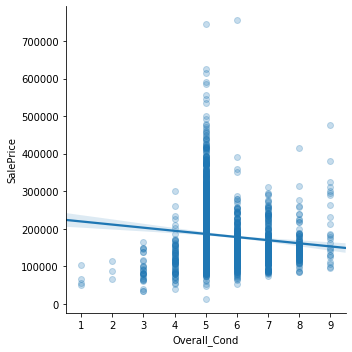

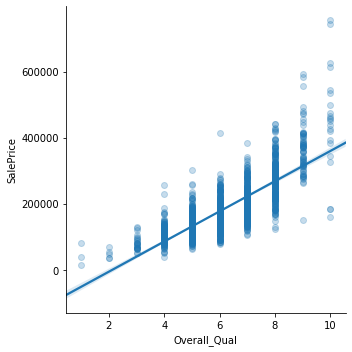

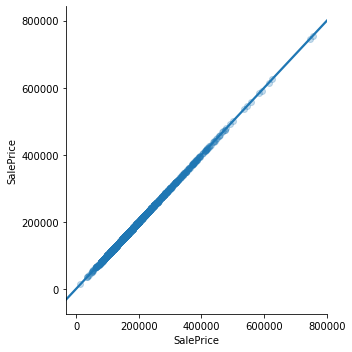

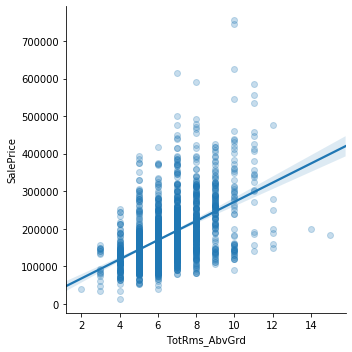

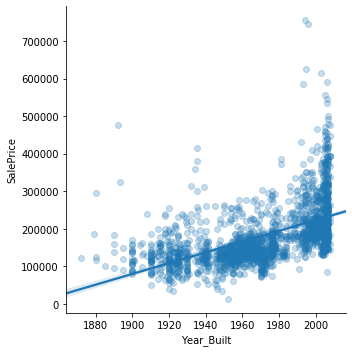

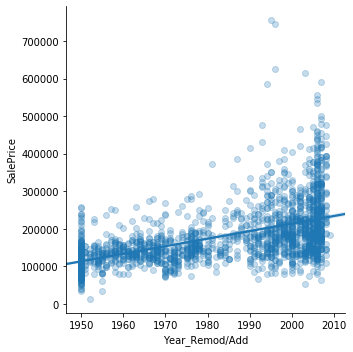

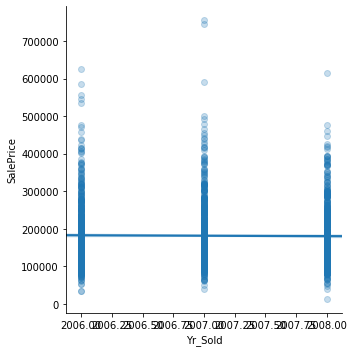

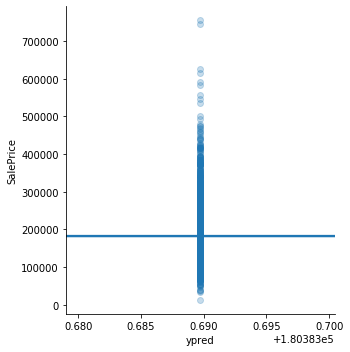

In [24]:
numeric=train.select_dtypes('number')
target='SalePrice'
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y=target, data=train, scatter_kws=dict(alpha=.25))
    plt.show()

In [67]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import numpy as np
selected=[]

#metrics=pd.DataFrame(columns=['k','linear_mae','linear_r2','ridge_mae','ridge_r2','features'])
metrics=np.zeros((len(xtrain_encoded.columns),6))
for k in range (1, len(xtrainscaled)-2):
    print(f'{k} features')
    selector=SelectKBest(score_func=f_regression, k=k)
    x_train_selected=selector.fit_transform(xtrainscaled,trainy)
    x_val_selected=selector.transform(xvalscaled)
    model = RidgeCV()
    model.fit(x_train_selected, trainy) 
    #print(model.score(xvalscaled, validatey))
    ypred=model.predict(x_val_selected)
    linearmae=mean_absolute_error(validatey, ypred)
    linearr2=r2_score(validatey,ypred)
    print(f'Ridge R^2 score {linearr2}')
    print(f'Ridge MAE: {linearmae}')
    
    model = LinearRegression(n_jobs=-1)
    model.fit(x_train_selected, trainy) 
    #print(model.score(xvalscaled, validatey))
    ypred=model.predict(x_val_selected)
    ridgemae=mean_absolute_error(validatey, ypred)
    ridger2=r2_score(validatey,ypred)
    print(f'Linear R^2 score {ridger2}')
    print(f'Linear MAE: {ridgemae}')
    print(selected_names)
    print('\n')
    all_names=xtrain_encoded.columns
    selected_mask=selector.get_support()
    selected_names=all_names[selected_mask]
    
    metrics[k-1,0]=k
    metrics[k-1,1]=linearmae
    metrics[k-1,2]=linearr2
    metrics[k-1,3]=ridgemae
    metrics[k-1,4]=ridger2
    selected.append(list(selected_names))
    #metrics[k-1,5]=selected_names
    #metrics[k-1,:]=[k, linearmae, linearr2, ridgemae, ridger2, k]
#     metrics=metrics.append(DataFrame({'k':k, 'linear_mae': linearmae, 'linear_r2': linearr2, 'ridge_mae': ridgemae, 'ridge_r2': ridger2, 'features': selected_names})


1 features
Ridge R^2 score 0.6725349712211893
Ridge MAE: 33188.99522210495
Linear R^2 score 0.6725057846034581
Linear MAE: 33203.13411167449
Index(['Gr_Liv_Area', 'Overall_Qual'], dtype='object')


2 features
Ridge R^2 score 0.7428016768493111
Ridge MAE: 29389.187764798706
Linear R^2 score 0.7428505249356503
Linear MAE: 29409.649931408396
Index(['Overall_Qual'], dtype='object')


3 features
Ridge R^2 score 0.7825703577289838
Ridge MAE: 26784.65830555665
Linear R^2 score 0.783979225886022
Linear MAE: 26847.385709242357
Index(['Gr_Liv_Area', 'Overall_Qual'], dtype='object')


4 features
Ridge R^2 score 0.7931389815680827
Ridge MAE: 25908.06345588209
Linear R^2 score 0.7947894236650834
Linear MAE: 25911.15942918481
Index(['1st_Flr_SF', 'Gr_Liv_Area', 'Overall_Qual'], dtype='object')


5 features
Ridge R^2 score 0.7932516970154431
Ridge MAE: 25865.502175955782
Linear R^2 score 0.7947048757251785
Linear MAE: 25928.3378887235
Index(['Exter_Qual_TA', '1st_Flr_SF', 'Gr_Liv_Area', 'Overall_Qual

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8118919425156428
Linear MAE: 24455.119116341448
Index(['Exter_Qual_TA', 'Kitchen_Qual_TA', '1st_Flr_SF', 'Full_Bath',
       'Gr_Liv_Area', 'Overall_Qual', 'Year_Built'],
      dtype='object')


9 features
Ridge R^2 score 0.810601144476772
Ridge MAE: 24347.001851015924
Linear R^2 score 0.8118493354379855
Linear MAE: 24472.330954006226
Index(['Exter_Qual_TA', 'Kitchen_Qual_TA', '1st_Flr_SF', 'Full_Bath',
       'Gr_Liv_Area', 'Overall_Qual', 'Year_Built', 'Year_Remod/Add'],
      dtype='object')


10 features
Ridge R^2 score 0.8442858357305356
Ridge MAE: 22216.80454713967
Linear R^2 score 0.8448393210391255
Linear MAE: 22309.804676523097
Index(['Exter_Qual_TA', 'Foundation_PConc', 'Kitchen_Qual_TA', '1st_Flr_SF',
       'Full_Bath', 'Gr_Liv_Area', 'Overall_Qual', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object')


11 features
Ridge R^2 score 0.8444841093372886
Ridge MAE: 22175.62550241908
Linear R^2 score 0.8451327127999265
Linear MAE: 22151.64320454997
In

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8565802767327744
Ridge MAE: 21543.719540601378
Linear R^2 score 0.8573527844793464
Linear MAE: 21481.089285911465
Index(['Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd', 'Foundation_PConc',
       'Heating_QC_Ex', 'Kitchen_Qual_TA', 'Kitchen_Qual_Ex', '1st_Flr_SF',
       'Full_Bath', 'Gr_Liv_Area', 'Overall_Qual', 'TotRms_AbvGrd',
       'Year_Built', 'Year_Remod/Add'],
      dtype='object')


16 features
Ridge R^2 score 0.8566771212463525
Ridge MAE: 21499.72809973613
Linear R^2 score 0.8574288932376958
Linear MAE: 21448.403324265855
Index(['Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd', 'Foundation_PConc',
       'Heating_QC_Ex', 'Kitchen_Qual_TA', 'Kitchen_Qual_Ex',
       'Neighborhood_NridgHt', '1st_Flr_SF', 'Full_Bath', 'Gr_Liv_Area',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add'],
      dtype='object')


17 features
Ridge R^2 score 0.8602350230143131
Ridge MAE: 21163.969404560317
Linear R^2 score 0.8605807610589842
Linear MAE: 2114

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8606039198384733
Ridge MAE: 21035.358019940915
Linear R^2 score 0.8608510763159134
Linear MAE: 20993.070353134935
Index(['MS_SubClass_60', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Foundation_PConc', 'Heating_QC_Ex', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Ex', 'Mas_Vnr_Type_None', 'Neighborhood_NridgHt',
       'Sale_Condition_Partial', 'Sale_Type_New', '1st_Flr_SF', 'Full_Bath',
       'Gr_Liv_Area', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object')


21 features
Ridge R^2 score 0.8602675691962887
Ridge MAE: 21074.942052908416
Linear R^2 score 0.8605617536657885
Linear MAE: 21021.14590293972
Index(['MS_SubClass_60', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Foundation_CBlock', 'Foundation_PConc', 'Heating_QC_Ex',
       'Kitchen_Qual_TA', 'Kitchen_Qual_Ex', 'Mas_Vnr_Type_None',
       'Neighborhood_NridgHt', 'Sale_Condition_Partial', 'Sale_Type_New',
       '1st_Flr_SF', 'Full_Bath', 'Gr_

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8671351241229375
Linear MAE: 20171.844954908905
Index(['MS_SubClass_60', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_2nd_VinylSd', 'Foundation_CBlock',
       'Foundation_PConc', 'Heating_QC_Ex', 'Heating_QC_TA', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Lot_Shape_Reg',
       'Mas_Vnr_Type_None', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge',
       'Sale_Condition_Partial', 'Sale_Type_New', '1st_Flr_SF', 'Full_Bath',
       'Gr_Liv_Area', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object')


28 features
Ridge R^2 score 0.8657225508137202
Ridge MAE: 20368.294056146882
Linear R^2 score 0.8659275319823276
Linear MAE: 20301.130944530654
Index(['MS_SubClass_60', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_2nd_VinylSd', 'Foundation_CBlock',
       'Foundation_PConc', 'Heating_QC_Ex', 'Heating_QC_TA', 'Kitchen_Q

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

32 features
Ridge R^2 score 0.8633774900919162
Ridge MAE: 20441.310080256182
Linear R^2 score 0.8630049731782817
Linear MAE: 20367.823547275297
Index(['MS_SubClass_60', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_2nd_VinylSd', 'Foundation_CBlock',
       'Foundation_PConc', 'Heating_QC_Ex', 'Heating_QC_TA', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Lot_Shape_IR1', 'Lot_Shape_Reg',
       'MS_Zoning_RM', 'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Roof_Style_Hip',
       'Sale_Condition_Partial', 'Sale_Type_New', '1st_Flr_SF', 'Full_Bath',
       'Gr_Liv_Area', 'Half_Bath', 'Overall_Qual', 'TotRms_AbvGrd',
       'Year_Built', 'Year_Remod/Add'],
      dtype='object')


33 features
Ridge R^2 score 0.863026515687645
Ridge MAE: 20478.117612225236
Linear R^2 score 0.8627920185232499
Linear MAE: 20394.836351868882
Index(['MS_SubClass_60', 'Exter_Qual_Ex', 'Exter_Qua

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8699163625195543
Ridge MAE: 19922.578528255344
Linear R^2 score 0.8695017468536503
Linear MAE: 19830.279090928696
Index(['MS_SubClass_60', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_2nd_VinylSd', 'Foundation_CBlock',
       'Foundation_PConc', 'Heating_QC_Ex', 'Heating_QC_TA', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Lot_Shape_IR1', 'Lot_Shape_Reg',
       'MS_Zoning_RM', 'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Paved_Drive_Y',
       'Roof_Style_Hip', 'Roof_Style_Gable', 'Sale_Condition_Partial',
       'Sale_Type_New', '1st_Flr_SF', 'Bsmt_Full_Bath', 'Full_Bath',
       'Gr_Liv_Area', 'Half_Bath', 'Overall_Qual', 'TotRms_AbvGrd',
       'Year_Built', 'Year_Remod/Add'],
      dtype='object')


36 features
Ridge R^2 score 0.870289504370377
Ridge MAE: 19951.81897504968
Linear R^2 score 0.8698127188119742
Linear MAE: 19850.8246662384
Index

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8701270127642853
Ridge MAE: 19974.921197017466
Linear R^2 score 0.8696378731416431
Linear MAE: 19880.45402197988
Index(['MS_SubClass_60', 'Central_Air_Y', 'Central_Air_N', 'Exter_Qual_Ex',
       'Exter_Qual_TA', 'Exter_Qual_Gd', 'Exterior_1st_VinylSd',
       'Exterior_2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc',
       'Heating_QC_Ex', 'Heating_QC_TA', 'Kitchen_Qual_TA', 'Kitchen_Qual_Gd',
       'Kitchen_Qual_Ex', 'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RM',
       'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace', 'Neighborhood_StoneBr',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Paved_Drive_Y',
       'Roof_Style_Hip', 'Roof_Style_Gable', 'Sale_Condition_Partial',
       'Sale_Type_New', '1st_Flr_SF', 'Bsmt_Full_Bath', 'Full_Bath',
       'Gr_Liv_Area', 'Half_Bath', 'Overall_Qual', 'TotRms_AbvGrd',
       'Year_Built', 'Year_Remod/Add'],
      dtype='object')


39 features
Ridge R^2 score 0.8746734476120439
Ridge MAE: 19614.376675444677
Line

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8753294590551903
Ridge MAE: 19574.241787383242
Linear R^2 score 0.8743949498804178
Linear MAE: 19520.090077884506
Index(['MS_SubClass_60', 'Central_Air_Y', 'Central_Air_N', 'Exter_Qual_Ex',
       'Exter_Qual_TA', 'Exter_Qual_Gd', 'Exterior_1st_VinylSd',
       'Exterior_2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc',
       'Heating_QC_Ex', 'Heating_QC_TA', 'House_Style_2Story',
       'Kitchen_Qual_TA', 'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex',
       'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM',
       'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace', 'Neighborhood_StoneBr',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Paved_Drive_Y',
       'Paved_Drive_N', 'Roof_Style_Hip', 'Roof_Style_Gable',
       'Sale_Condition_Partial', 'Sale_Type_New', '1st_Flr_SF',
       'Bsmt_Full_Bath', 'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Lot_Area',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add'],
      dtype='object')


43 fea

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8766014995261826
Ridge MAE: 19483.816986882735
Linear R^2 score 0.8760728884865611
Linear MAE: 19375.482319329443
Index(['MS_SubClass_60', 'Central_Air_Y', 'Central_Air_N', 'Electrical_SBrkr',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_2nd_VinylSd', 'Foundation_CBlock',
       'Foundation_PConc', 'Heating_QC_Ex', 'Heating_QC_TA',
       'House_Style_2Story', 'Kitchen_Qual_TA', 'Kitchen_Qual_Gd',
       'Kitchen_Qual_Ex', 'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL',
       'MS_Zoning_RM', 'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace',
       'Mas_Vnr_Type_Stone', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt',
       'Neighborhood_NoRidge', 'Paved_Drive_Y', 'Paved_Drive_N',
       'Roof_Style_Hip', 'Roof_Style_Gable', 'Sale_Condition_Partial',
       'Sale_Type_WD ', 'Sale_Type_New', '1st_Flr_SF', 'Bsmt_Full_Bath',
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Lot_Area', 'Overall_Qual',
       'TotRms_AbvGrd

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8776486488831587
Ridge MAE: 19430.067500254198
Linear R^2 score 0.8772916970570243
Linear MAE: 19330.39859257627
Index(['MS_SubClass_60', 'MS_SubClass_30', 'Central_Air_Y', 'Central_Air_N',
       'Electrical_SBrkr', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_2nd_VinylSd', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_BrkTil', 'Heating_QC_Ex',
       'Heating_QC_TA', 'House_Style_2Story', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Land_Contour_HLS',
       'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM',
       'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace', 'Mas_Vnr_Type_Stone',
       'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge',
       'Paved_Drive_Y', 'Paved_Drive_N', 'Roof_Style_Hip', 'Roof_Style_Gable',
       'Sale_Condition_Partial', 'Sale_Type_WD ', 'Sale_Type_New',
       '1st_Flr_SF', 'Bsmt_Full_Bath', 'Full_Bath', 'Gr_Liv_Area', 'Hal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8776087588395849
Ridge MAE: 19499.34154856911
Linear R^2 score 0.8769623102465276
Linear MAE: 19369.791925465837
Index(['MS_SubClass_60', 'MS_SubClass_30', 'Central_Air_Y', 'Central_Air_N',
       'Electrical_SBrkr', 'Electrical_FuseA', 'Exter_Qual_Ex',
       'Exter_Qual_TA', 'Exter_Qual_Gd', 'Exterior_1st_VinylSd',
       'Exterior_2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_BrkTil', 'Heating_QC_Ex', 'Heating_QC_TA',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Land_Contour_HLS',
       'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM',
       'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace', 'Mas_Vnr_Type_Stone',
       'Neighborhood_NAmes', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_IDOTRR',
       'Paved_Drive_Y', 'Paved_Drive_N', 'Roof_Style_Hip', 'Roof_Style_Gable',
       'Sale_

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8797588195935876
Ridge MAE: 19443.836281637497
Linear R^2 score 0.8787106785838943
Linear MAE: 19355.260869565216
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_BrkTil', 'Heating_QC_Ex', 'Heating_QC_TA',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Land_Contour_HLS',
       'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM',
       'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace', 'Mas_Vnr_Type_Stone',
       'Neighborhood_NAmes', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_IDOTRR',
       'Paved_Driv

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8808117557537153
Ridge MAE: 19440.78670877502
Linear R^2 score 0.8795508561696497
Linear MAE: 19329.388838441915
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_BrkTil', 'Heating_QC_Ex', 'Heating_QC_TA',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Land_Contour_HLS',
       'Lot_Config_CulDSac', 'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL',
       'MS_Zoning_RM', 'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace',
       'Mas_Vnr_Type_Stone', 'Neighborhood_NAmes', 'Neighborhood_StoneBr',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_OldTown',
       'Neighborhood

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8793476177171207
Ridge MAE: 19326.96733759731
Linear R^2 score 0.8732712736157306
Linear MAE: 19841.428571428572
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_BrkTil', 'Heating_QC_Ex', 'Heating_QC_TA',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Land_Contour_HLS',
       'Lot_Config_CulDSac', 'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL',
       'MS_Zoning_RM', 'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace',
       'Mas_Vnr_Type_Stone', 'Neighborhood_NAmes', 'Neighborhood_StoneBr',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_Somerst',
       'Neighborhood

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8782264082556983
Ridge MAE: 19479.003956459423
Linear R^2 score 0.8770092443653771
Linear MAE: 19572.33850931677
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_BrkTil', 'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Kitchen_Qual_Fa',
       'Land_Contour_HLS', 'Lot_Config_CulDSac', 'Lot_Shape_IR1',
       'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM', 'Mas_Vnr_Type_None',
       'Mas_Vnr_Type_BrkFace', 'Mas_Vnr_Type_Stone', 'Neighborhood_NAmes',
       'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8782523333921886
Ridge MAE: 19513.52099516216
Linear R^2 score 0.8770803895059284
Linear MAE: 19444.257763975154
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_BrkTil', 'Heating_QC_Ex',
       'Heating_QC_TA', 'Heating_QC_Gd', 'House_Style_2Story',
       'House_Style_1.5Fin', 'Kitchen_Qual_TA', 'Kitchen_Qual_Gd',
       'Kitchen_Qual_Ex', 'Kitchen_Qual_Fa', 'Land_Contour_HLS',
       'Lot_Config_CulDSac', 'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL',
       'MS_Zoning_RM', 'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace',
       'Mas_Vnr_Type_Stone', 'Neighborhood_NAmes', 'Neighborhood_StoneBr',
       'Neighborhood_NridgHt', '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.878173925065689
Ridge MAE: 19524.30761871671
Linear R^2 score 0.870118718245817
Linear MAE: 20181.872670807454
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd', 'Exterior_1st_AsbShng',
       'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_BrkTil', 'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Kitchen_Qual_Fa',
       'Land_Contour_HLS', 'Lot_Config_CulDSac', 'Lot_Shape_IR1',
       'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM', 'Mas_Vnr_Type_None',
       'Mas_Vnr_Type_BrkFace', 'Mas_Vnr_Type_Stone', 'Neighborhood_NAmes',
       'Ne

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.877364349553651
Linear MAE: 19425.41129658385
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd', 'Exterior_1st_AsbShng',
       'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_BrkTil', 'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd',
       'Heating_QC_Fa', 'House_Style_2Story', 'House_Style_1.5Fin',
       'Kitchen_Qual_TA', 'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex',
       'Kitchen_Qual_Fa', 'Land_Contour_HLS', 'Lot_Config_CulDSac',
       'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM',
       'Mas_Vnr_Type_None', 'Mas_Vnr_Type_BrkFace', 'Mas_Vnr_Type_Stone',
       'Neighborhood_NAmes', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt',
  

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8803254365752394
Ridge MAE: 19342.994055359482
Linear R^2 score 0.8794788507723619
Linear MAE: 19254.03105590062
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Electrical_FuseF', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_BrkTil',
       'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd', 'Heating_QC_Fa',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Kitchen_Qual_Fa',
       'Land_Contour_HLS', 'Lot_Config_CulDSac', 'Lot_Shape_IR1',
       'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM', 'Mas_Vnr_Type_Non

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.880455244372502
Ridge MAE: 19292.259008755478
Linear R^2 score 0.879663434928338
Linear MAE: 19171.819875776397
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Electrical_FuseF', 'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA',
       'Exter_Qual_Gd', 'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd',
       'Exterior_1st_CemntBd', 'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng',
       'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_BrkTil', 'Functional_Typ', 'Heating_QC_Ex', 'Heating_QC_TA',
       'Heating_QC_Gd', 'Heating_QC_Fa', 'House_Style_2Story',
       'House_Style_1.5Fin', 'Kitchen_Qual_TA', 'Kitchen_Qual_Gd',
       'Kitchen_Qual_Ex', 'Kitchen_Qual_Fa', 'Land_Contour_HLS',
       'Lot_Config_CulDSac', 'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL',

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8792329189103296
Linear MAE: 19450.02795031056
Index(['MS_SubClass_60', 'MS_SubClass_50', 'MS_SubClass_30', 'Central_Air_Y',
       'Central_Air_N', 'Condition_1_Feedr', 'Electrical_SBrkr',
       'Electrical_FuseA', 'Electrical_FuseF', 'Exter_Cond_Fa',
       'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_BrkTil',
       'Functional_Typ', 'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd',
       'Heating_QC_Fa', 'House_Style_2Story', 'House_Style_1.5Fin',
       'Kitchen_Qual_TA', 'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex',
       'Kitchen_Qual_Fa', 'Land_Contour_HLS', 'Lot_Config_CulDSac',
       'Lot_Shape_IR1', 'Lot_Shape_Reg', 'MS_Zoning_RL', 'MS_Zoning_RM',
       'Mas_Vnr_Typ

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8852008354045899
Ridge MAE: 18919.863120411228
Linear R^2 score 0.8842483632387242
Linear MAE: 18812.782608695652
Index(['MS_SubClass_60', 'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Central_Air_Y', 'Central_Air_N', 'Condition_1_Feedr',
       'Electrical_SBrkr', 'Electrical_FuseA', 'Electrical_FuseF',
       'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_BrkTil',
       'Functional_Typ', 'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd',
       'Heating_QC_Fa', 'House_Style_2Story', 'House_Style_1.5Fin',
       'Kitchen_Qual_TA', 'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex',
       'Kitchen_Qual_Fa', 'Land_Contour_HLS', 'Lot_Config_CulDSac',
       

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.890390452436488
Ridge MAE: 18552.228709940828
Linear R^2 score 0.8897119909141984
Linear MAE: 18472.711180124224
Index(['MS_SubClass_60', 'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N', 'Condition_1_Norm',
       'Condition_1_Feedr', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Electrical_FuseF', 'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA',
       'Exter_Qual_Gd', 'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd',
       'Exterior_1st_CemntBd', 'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng',
       'Exterior_2nd_MetalSd', 'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_BrkTil', 'Functional_Typ',
       'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd', 'Heating_QC_Fa',
       'House_Style_2Story', 'House_Style_1.5Fin', 'Kitchen_Qual_TA',
       'Kitchen_Qual_Gd', 'Kitchen_Qual_Ex', 'Kitch

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8930926905904513
Ridge MAE: 18116.840969515688
Linear R^2 score 0.8924507242542717
Linear MAE: 18065.58695652174
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_160',
       'MS_SubClass_50', 'MS_SubClass_30', 'Bldg_Type_Twnhs', 'Central_Air_Y',
       'Central_Air_N', 'Condition_1_Norm', 'Condition_1_Feedr',
       'Electrical_SBrkr', 'Electrical_FuseA', 'Electrical_FuseF',
       'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_MetalSd',
       'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_BrkTil', 'Functional_Typ', 'Heating_QC_Ex', 'Heating_QC_TA',
       'Heating_QC_Gd', 'Heating_QC_Fa', 'House_Style_2Story',
       'House_Style_1.5Fin', 'Kitchen_Qual_TA', 'Kitchen_Qual_Gd',
      

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8929628480982487
Ridge MAE: 18176.55245145838
Linear R^2 score 0.8922063501746396
Linear MAE: 18088.711180124224
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N',
       'Condition_1_Norm', 'Condition_1_Feedr', 'Condition_1_Artery',
       'Electrical_SBrkr', 'Electrical_FuseA', 'Electrical_FuseF',
       'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_MetalSd',
       'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_BrkTil', 'Functional_Typ', 'Heating_QC_Ex', 'Heating_QC_TA',
       'Heating_QC_Gd', 'Heating_QC_Fa', 'House_Style_2Story',
      

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

91 features
Ridge R^2 score 0.8932919344931722
Ridge MAE: 18032.214499076756
Linear R^2 score 0.8919663142355867
Linear MAE: 18035.850931677018
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N',
       'Condition_1_Norm', 'Condition_1_Feedr', 'Condition_1_Artery',
       'Electrical_SBrkr', 'Electrical_FuseA', 'Electrical_FuseF',
       'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exter_Qual_Fa', 'Exterior_1st_MetalSd', 'Exterior_1st_VinylSd',
       'Exterior_1st_CemntBd', 'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng',
       'Exterior_2nd_MetalSd', 'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_BrkTil', 'Functional_Typ',
       'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd', 'Heating_QC_Fa'

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.895197812354114
Ridge MAE: 17977.252282776048
Linear R^2 score 0.8958152960620182
Linear MAE: 17902.962732919255
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N',
       'Condition_1_Norm', 'Condition_1_Feedr', 'Condition_1_Artery',
       'Electrical_SBrkr', 'Electrical_FuseA', 'Electrical_FuseF',
       'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA', 'Exter_Qual_Gd',
       'Exter_Qual_Fa', 'Exterior_1st_MetalSd', 'Exterior_1st_HdBoard',
       'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd', 'Exterior_1st_AsbShng',
       'Exterior_1st_Wd Sdng', 'Exterior_2nd_MetalSd', 'Exterior_2nd_VinylSd',
       'Exterior_2nd_CmentBd', 'Exterior_2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_BrkTil',
       'Functional_Typ', 'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd',
    

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8934646293595103
Linear MAE: 18007.736024844722
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N',
       'Condition_1_Norm', 'Condition_1_Feedr', 'Condition_1_Artery',
       'Condition_2_PosA', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Electrical_FuseF', 'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA',
       'Exter_Qual_Gd', 'Exter_Qual_Fa', 'Exterior_1st_MetalSd',
       'Exterior_1st_HdBoard', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_MetalSd',
       'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd', 'Exterior_2nd_AsbShng',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_BrkTil', 'Functional_Typ',
       'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd', 'Heating_QC_Fa',


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8952359371572246
Ridge MAE: 17996.48152011014
Linear R^2 score 0.8947541913603043
Linear MAE: 17975.8850931677
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N',
       'Condition_1_Norm', 'Condition_1_Feedr', 'Condition_1_Artery',
       'Condition_2_PosA', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Electrical_FuseF', 'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA',
       'Exter_Qual_Gd', 'Exter_Qual_Fa', 'Exterior_1st_MetalSd',
       'Exterior_1st_HdBoard', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_MetalSd',
       'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd', 'Exterior_2nd_AsbShng',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_BrkTil', 'Functional_Typ',
       'Heati

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8945112495758929
Linear MAE: 17972.006211180124
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N',
       'Condition_1_Norm', 'Condition_1_Feedr', 'Condition_1_Artery',
       'Condition_2_PosA', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Electrical_FuseF', 'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA',
       'Exter_Qual_Gd', 'Exter_Qual_Fa', 'Exterior_1st_MetalSd',
       'Exterior_1st_HdBoard', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_MetalSd',
       'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd', 'Exterior_2nd_AsbShng',
       'Exterior_2nd_Wd Sdng', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_BrkTil', 'Functional_Typ',
       'Heating_QC_Ex', 'Heating_QC_TA', 'Heating_QC_Gd', 'Heating_QC_Fa',


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8950894603302052
Ridge MAE: 17985.833411890624
Linear R^2 score 0.8873787606784596
Linear MAE: 18346.760869565216
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_50', 'MS_SubClass_30',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Central_Air_Y', 'Central_Air_N',
       'Condition_1_Norm', 'Condition_1_Feedr', 'Condition_1_Artery',
       'Condition_2_PosA', 'Electrical_SBrkr', 'Electrical_FuseA',
       'Electrical_FuseF', 'Exter_Cond_Fa', 'Exter_Qual_Ex', 'Exter_Qual_TA',
       'Exter_Qual_Gd', 'Exter_Qual_Fa', 'Exterior_1st_MetalSd',
       'Exterior_1st_HdBoard', 'Exterior_1st_VinylSd', 'Exterior_1st_CemntBd',
       'Exterior_1st_AsbShng', 'Exterior_1st_Wd Sdng', 'Exterior_2nd_MetalSd',
       'Exterior_2nd_HdBoard', 'Exterior_2nd_VinylSd', 'Exterior_2nd_CmentBd',
       'Exterior_2nd_AsbShng', 'Exterior_2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_BrkTil',
    

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8946156795689355
Ridge MAE: 18061.076539453832
Linear R^2 score 0.8894442455490031
Linear MAE: 18352.701863354036
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_Duplex', 'Bldg_Type_Twnhs',
       'Bldg_Type_2fmCon',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=102)


104 features
Ridge R^2 score 0.8941461017740108
Ridge MAE: 18156.691649896584
Linear R^2 score 0.893794005382797
Linear MAE: 18158.571428571428
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_Duplex', 'Bldg_Type_Twnhs',
       'Bldg_Type_2fmCon',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvG

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.894053335982991
Ridge MAE: 18164.153101534146
Linear R^2 score 0.8937553048032205
Linear MAE: 18165.03105590062
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=104)


106 features
Ridge R^2 score 0.8940530485303733
Ridge MAE: 18164.135821138898
Linear R^2 score 0.89362145740565
Linear MAE: 18161.627329192546
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lo

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8941247002595921
Ridge MAE: 18130.141310015035
Linear R^2 score 0.8933121636323783
Linear MAE: 18120.85403726708
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=106)


108 features
Ridge R^2 score 0.8923782900752026
Ridge MAE: 18384.397446959647
Linear R^2 score 0.8913181242719849
Linear MAE: 18428.009316770185
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8923159547301102
Ridge MAE: 18342.712537644184
Linear R^2 score 0.892983156557505
Linear MAE: 18363.35714285714
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=109)


111 features
Ridge R^2 score 0.8923115769926279
Ridge MAE: 18343.153754183426


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Linear R^2 score 0.8927936752939658
Linear MAE: 18386.624223602485
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=110)


112 features
Ridge R^2 score 0.8923866125133963
Ridge MAE: 18332.92794020877


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Linear R^2 score 0.8910163828221409
Linear MAE: 18405.152173913044
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=111)


113 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8925237433871857
Ridge MAE: 18290.678982915168
Linear R^2 score 0.891977902039108
Linear MAE: 18370.736024844722
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=112)


114 features
Ridge R^2 score 0.8921728216610444
Ridge MAE: 18333.544643823687


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8919403587459751
Linear MAE: 18497.108695652172
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=113)


115 features
Ridge R^2 score 0.8921650622935001
Ridge MAE: 18336.30759592523
Linear R^2 score 0.8906516159012331
Linear MAE: 18451.32608695652
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'Bldg_Type_1Fam', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd'

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Linear R^2 score 0.8875658875694481
Linear MAE: 18702.332298136647
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'Bldg_Type_1Fam',
       'Bldg_Type_Duplex',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=115)


117 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.889924597478973
Ridge MAE: 18524.303532847338
Linear R^2 score 0.8884926718556143
Linear MAE: 18600.785714285714
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'Bldg_Type_1Fam',
       'Bldg_Type_Duplex',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=116)


118 features
Ridge R^2 score 0.8899298043601259
Ridge MAE: 18519.073476199108


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8884174969536605
Linear MAE: 18635.344720496894
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'Bldg_Type_1Fam',
       'Bldg_Type_TwnhsE',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=117)


119 features
Ridge R^2 score 0.8899367563429061
Ridge MAE: 18523.689160673694


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Linear R^2 score 0.8880162503592873
Linear MAE: 18738.773291925467
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'Bldg_Type_1Fam',
       'Bldg_Type_TwnhsE',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=118)


120 features
Ridge R^2 score 0.8898377648369368
Ridge MAE: 18534.705559215105
Linear R^2 score 0.8882421661569095
Linear MAE: 18625.872670807454
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'Bldg_Type_1Fam',
       'Bldg_Type_TwnhsE',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd'

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8876688978148571
Linear MAE: 18609.88198757764
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'Mo_Sold_4', 'Bldg_Type_1Fam',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=120)


122 features
Ridge R^2 score 0.8897882552935051
Ridge MAE: 18527.068966643088
Linear R^2 score 0.8872891931692016
Linear MAE: 18657.245341614907
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'MS_SubClass_180', 'Mo_Sold_4',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide



Ridge R^2 score 0.8899401965419383
Ridge MAE: 18533.313329904468
Linear R^2 score 0.8878092687039437
Linear MAE: 18612.195652173912
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'MS_SubClass_180', 'Mo_Sold_4',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=122)


124 features


/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWar

Ridge R^2 score 0.8905440421704415
Ridge MAE: 18387.176592380583
Linear R^2 score 0.8881878896709317
Linear MAE: 18534.05590062112
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'MS_SubClass_180', 'Mo_Sold_4',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=123)


125 features
Ridge R^2 score 0.890448330707662
Ridge MAE: 18393.23249460404
Linear R^2 score 0.8882538224103947
Linear MAE: 18561.583850931678
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'MS_SubClass_180', 'Mo_Sold_4',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Co

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8903307092274061
Ridge MAE: 18371.36454988266
Linear R^2 score 0.8880953866427896
Linear MAE: 18520.66459627329
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'MS_SubClass_180', 'Mo_Sold_4',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=125)


127 features
Ridge R^2 score 0.8903044552784523
Ridge MAE: 18380.781969724892
Linear R^2 score 0.8880984410983179
Linear MAE: 18469.434782608696
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_45', 'MS_SubClass_180', 'Mo_Sold_4',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_C

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8903415823456247
Ridge MAE: 18369.036283803773
Linear R^2 score 0.8893637188012347
Linear MAE: 18440.739130434784
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=127)


129 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8906129224971304
Ridge MAE: 18331.675700045173
Linear R^2 score 0.8872363009550837
Linear MAE: 18517.198757763974
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=128)


130 features
Ridge R^2 score 0.890616659403866
Ridge MAE: 18317.747804690345
Linear R^2 score 0.8878138481740383
Linear MAE: 18481.198757763974
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
      

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8807514382299519
Linear MAE: 18643.739130434784
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=130)


132 features
Ridge R^2 score 0.8861186777112142
Ridge MAE: 18427.443593404358
Linear R^2 score 0.8791799655338837
Linear MAE: 18631.428571428572
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8866978020841377
Ridge MAE: 18373.255328575855
Linear R^2 score 0.8803380022818594
Linear MAE: 18517.82608695652
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=132)


134 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8865723401740502
Ridge MAE: 18393.16203878864
Linear R^2 score 0.8800834351453584
Linear MAE: 18543.844720496894
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=133)


135 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8862048485551026
Ridge MAE: 18420.29805909853
Linear R^2 score 0.8813268180915714
Linear MAE: 18546.07763975155
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=134)


136 features
Ridge R^2 score 0.8860504983646316
Ridge MAE: 18422.61466633559
Linear R^2 score 0.8803617010070075
Linear MAE: 18607.39751552795
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'O

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8860755346480711
Ridge MAE: 18419.303635545068
Linear R^2 score 0.8799421621356196
Linear MAE: 18667.68944099379
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=136)


138 features
Ridge R^2 score 0.8860327203642958
Ridge MAE: 18420.210110598437
Linear R^2 score 0.8806199766141504
Linear MAE: 18566.608695652172
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
      

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8861143249763742
Ridge MAE: 18401.20780140394
Linear R^2 score 0.8803236057787207
Linear MAE: 18615.428571428572
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=138)


140 features
Ridge R^2 score 0.8863362884243133
Ridge MAE: 18397.383400544975
Linear R^2 score 0.8803142329162877
Linear MAE: 18642.11801242236
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.886330123970864
Ridge MAE: 18399.586229274846
Linear R^2 score 0.8810926972041213
Linear MAE: 18645.72360248447
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=141)


143 features
Ridge R^2 score 0.8862816724444835
Ridge MAE: 18405.36303795652


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8737449417575446
Linear MAE: 19429.170807453414
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=142)


144 features
Ridge R^2 score 0.8862916948611089
Ridge MAE: 18404.82624169864
Linear R^2 score 0.8807234801449713
Linear MAE: 18716.50310559006
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
  

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8860062317396975
Ridge MAE: 18481.395475475336
Linear R^2 score 0.8800927133102108
Linear MAE: 18640.2950310559
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=144)


146 features
Ridge R^2 score 0.8858126183139019
Ridge MAE: 18486.295620469937
Linear R^2 score 0.8786944648937598
Linear MAE: 18873.05900621118
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45', 'MS_SubClass_180',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8868277631470205
Ridge MAE: 18389.63487357566
Linear R^2 score 0.8797237355796028
Linear MAE: 18827.732919254657
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=147)


149 features
Ridge R^2 score 0.8866729239011222
Ridge MAE: 18409.069520106954
Linear R^2 score 0.8807433735796526
Linear MAE: 18614.211180124224
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8807084216076668
Linear MAE: 18619.05590062112
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=149)


151 features
Ridge R^2 score 0.886520955958191
Ridge MAE: 18428.911933794094
Linear R^2 score 0.8806240208693458
Linear MAE: 18661.229813664595
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
    

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8864723824124605
Ridge MAE: 18445.068041664163
Linear R^2 score 0.8818787352671056
Linear MAE: 18519.478260869564
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=151)


153 features
Ridge R^2 score 0.8864338066203606
Ridge MAE: 18447.896595040023
Linear R^2 score 0.8797752519123058
Linear MAE: 18798.94409937888
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.886430831194908
Ridge MAE: 18448.108565757593
Linear R^2 score 0.8807594450794068
Linear MAE: 18700.068322981366
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=153)


155 features
Ridge R^2 score 0.8864064923994219
Ridge MAE: 18444.390415118018
Linear R^2 score 0.8815273892042821
Linear MAE: 18552.847826086956
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_190', 'MS_SubClass_50',
       'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70', 'MS_SubClass_45',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8864013747486901
Ridge MAE: 18420.796039332236
Linear R^2 score 0.8811740555079131
Linear MAE: 18732.655279503106
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=155)


157 features
Ridge R^2 score 0.8864162231633005
Ridge MAE: 18419.23956635314
Linear R^2 score 0.8825588823045456
Linear MAE: 18605.10248447205
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'O

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8864244411706207
Ridge MAE: 18415.948825858686
Linear R^2 score 0.8739928165173455
Linear MAE: 19586.24844720497
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=157)


159 features
Ridge R^2 score 0.8863983489535896
Ridge MAE: 18417.17569275074
Linear R^2 score 0.8783547118642743
Linear MAE: 19018.819875776397
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'O

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8864486392030781
Ridge MAE: 18429.035785272757
Linear R^2 score 0.8732702784952935
Linear MAE: 19840.257763975154
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=159)


161 features
Ridge R^2 score 0.8865174752644057
Ridge MAE: 18419.704465827603
Linear R^2 score 0.8788500335393888
Linear MAE: 18734.009316770185
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.886518116998625
Ridge MAE: 18419.125197794532
Linear R^2 score 0.8800395104601364
Linear MAE: 18604.226708074533
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=161)


163 features
Ridge R^2 score 0.8870235082643316
Ridge MAE: 18311.64631472663
Linear R^2 score 0.8794222211511776
Linear MAE: 18538.043478260868
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'O

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.886724079313962
Ridge MAE: 18279.591094549432
Linear R^2 score 0.8793148538923722
Linear MAE: 18548.32298136646
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=163)


165 features
Ridge R^2 score 0.8863808542034397
Ridge MAE: 18305.558666063098
Linear R^2 score 0.8796706263508277
Linear MAE: 18489.459627329194
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'O

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8865028656753525
Ridge MAE: 18310.892720332788
Linear R^2 score 0.8798808492798496
Linear MAE: 18756.186335403727
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=165)


167 features
Ridge R^2 score 0.8864971763968974
Ridge MAE: 18312.004717092896
Linear R^2 score 0.8802259168491235
Linear MAE: 18670.217391304348
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8865165897021171
Ridge MAE: 18310.47964119905
Linear R^2 score 0.8786853272972864
Linear MAE: 18801.652173913044
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=167)


169 features
Ridge R^2 score 0.8866103784891688
Ridge MAE: 18312.913746759317
Linear R^2 score 0.8788901195239522
Linear MAE: 18640.229813664595
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8866128435767551
Ridge MAE: 18314.538114637788
Linear R^2 score 0.8784149967048176
Linear MAE: 18879.05590062112
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=169)


171 features
Ridge R^2 score 0.8865254048119984
Ridge MAE: 18324.661858730786


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8789421098751191
Linear MAE: 18840.850931677018
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=170)


172 features
Ridge R^2 score 0.8866735916150044
Ridge MAE: 18312.106809934405
Linear R^2 score 0.8808598723107403
Linear MAE: 18627.459627329194
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
  

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8866840581528814
Ridge MAE: 18302.199540244354
Linear R^2 score 0.8799099673836636
Linear MAE: 18741.42236024845
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=172)


174 features
Ridge R^2 score 0.8866872257520815
Ridge MAE: 18301.871982466382
Linear R^2 score 0.8789988877066575
Linear MAE: 18845.655279503106
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8865511204824366
Ridge MAE: 18284.905377336094
Linear R^2 score 0.8786092443475546
Linear MAE: 18535.67701863354
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_190',
       'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30', 'MS_SubClass_70',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=174)


176 features
Ridge R^2 score 0.8866030876522518
Ridge MAE: 18279.024853092993
Linear R^2 score 0.8800294201577977
Linear MAE: 18679.130434782608
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8869867119026856
Ridge MAE: 18220.62542958575
Linear R^2 score 0.8805819672458117
Linear MAE: 18613.301242236026
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=176)


178 features
Ridge R^2 score 0.8869974006887048
Ridge MAE: 18220.129022255533
Linear R^2 score 0.8806038137517712
Linear MAE: 18698.931677018634
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Linear R^2 score 0.8819742326306216
Linear MAE: 18529.040372670806
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=178)


180 features
Ridge R^2 score 0.886560330542052
Ridge MAE: 18236.446531970712
Linear R^2 score 0.8796422274453506
Linear MAE: 18577.987577639753
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
   

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure

Ridge R^2 score 0.8865499034744138
Ridge MAE: 18237.767525596846
Linear R^2 score 0.8803745303387092
Linear MAE: 18532.506211180124
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=180)


182 features
Ridge R^2 score 0.8864982015432415
Ridge MAE: 18244.855424095724
Linear R^2 score 0.8805339419446445
Linear MAE: 18477.27950310559
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       '

/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8864572141636476
Ridge MAE: 18264.629939262464
Linear R^2 score 0.880206515335554
Linear MAE: 18468.36645962733
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=182)


184 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8867750010794772
Ridge MAE: 18306.315288224894
Linear R^2 score 0.8787484890524484
Linear MAE: 18868.773291925467
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=183)


185 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8868458214199373
Ridge MAE: 18293.79462880116
Linear R^2 score 0.8792433376489504
Linear MAE: 18677.062111801242
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=184)


186 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8868207444487946
Ridge MAE: 18304.391876498023
Linear R^2 score 0.8800343079900155
Linear MAE: 18856.3850931677
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=185)


187 features
Ridge R^2 score 0.8868416679527297
Ridge MAE: 18303.85391160341


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Linear R^2 score 0.8780102857130769
Linear MAE: 19073.596273291925
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=186)


188 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8868637574453593
Ridge MAE: 18296.132000736816
Linear R^2 score -1.389760089015626e+21
Linear MAE: 118943400053232.0
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=187)


189 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8868675215028933
Ridge MAE: 18294.8289666742
Linear R^2 score -6.06239534840431e+21
Linear MAE: 248423432629527.1
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=188)


190 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8868358933248204
Ridge MAE: 18281.157528089305
Linear R^2 score -7.254003528700353e+21
Linear MAE: 271743592351140.22
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=189)


191 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8866718796113157
Ridge MAE: 18292.77759861584
Linear R^2 score -1.0026184397361007e+21
Linear MAE: 101027190327936.98
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=190)


192 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8866856021205817
Ridge MAE: 18291.958312120718
Linear R^2 score -4.2523355884578674e+21
Linear MAE: 208057893267841.16
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=191)


193 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8866822422377626
Ridge MAE: 18292.55475831476
Linear R^2 score -1.856264463265642e+21
Linear MAE: 137464436570498.78
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=192)


194 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8867498141706351
Ridge MAE: 18274.221452656977
Linear R^2 score -2.425461229113797e+22
Linear MAE: 496898401306009.6
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=193)


195 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8862799426873257
Ridge MAE: 18271.554557378662
Linear R^2 score -1.4640200838721256e+22
Linear MAE: 386050348044800.75
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=194)


196 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8863361482493323
Ridge MAE: 18238.468601626344
Linear R^2 score -6.342784908838577e+21
Linear MAE: 254103369026924.88
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=195)


197 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8863034010262361
Ridge MAE: 18252.980195682983
Linear R^2 score -1.402251177342312e+21
Linear MAE: 119476732757854.19
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=196)


198 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8861070956677514
Ridge MAE: 18280.072332683972
Linear R^2 score -8.539412636093352e+19
Linear MAE: 29483866167574.95
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=197)


199 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8861429117679106
Ridge MAE: 18277.368487456497
Linear R^2 score -2.5760131597804913e+20
Linear MAE: 51208784781001.72
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=198)


200 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8860396302447806
Ridge MAE: 18297.351545906917
Linear R^2 score -3.9526350414666976e+20
Linear MAE: 63432786461687.28
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=199)


201 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8861969975252654
Ridge MAE: 18295.947417215946
Linear R^2 score -2.838059097674599e+21
Linear MAE: 169973473054259.34
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=200)


202 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8862453505156868
Ridge MAE: 18296.02178524306
Linear R^2 score -9.766665109747496e+21
Linear MAE: 315314236202911.25
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=201)


203 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.885916803460506
Ridge MAE: 18269.476506346087
Linear R^2 score -1.978657638372998e+21
Linear MAE: 141923972616367.8
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=202)


204 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8858591808021705
Ridge MAE: 18274.24253386823
Linear R^2 score -1.3597519534112759e+22
Linear MAE: 372049115807793.6
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=203)


205 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8861986343421336
Ridge MAE: 18230.053963566665
Linear R^2 score -3.850085040019156e+19
Linear MAE: 19797283056664.652
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=204)


206 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.886770143690652
Ridge MAE: 18157.184376330115
Linear R^2 score -3.5919149956880547e+21
Linear MAE: 191220062694579.1
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=205)


207 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8867869948401671
Ridge MAE: 18158.12338989312
Linear R^2 score -5.847595754163993e+21
Linear MAE: 243982738797335.84
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=206)


208 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8867341355026765
Ridge MAE: 18163.54262248897
Linear R^2 score -1.9621930346249265e+22
Linear MAE: 465613525604930.3
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=207)


209 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8867704008762322
Ridge MAE: 18150.957832132026
Linear R^2 score -1.6522608353367593e+21
Linear MAE: 133090977315595.25
Index(['MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85', 'MS_SubClass_30',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=208)


210 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8874905859973794
Ridge MAE: 18153.206914389495
Linear R^2 score -2.436160281232197e+21
Linear MAE: 214560176043218.12
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=209)


211 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8874819407261757
Ridge MAE: 18154.096980822404
Linear R^2 score -4.580187766547604e+22
Linear MAE: 689620462839362.2
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=210)


212 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8877507855988539
Ridge MAE: 18144.925068979643
Linear R^2 score -3.0614909300649555e+21
Linear MAE: 187444556023538.78
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=211)


213 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8877872740046339
Ridge MAE: 18139.15260432896
Linear R^2 score -6.094267498503913e+20
Linear MAE: 94345367909928.89
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=212)


214 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8877538622805629
Ridge MAE: 18141.07538460759
Linear R^2 score -3.885941957015609e+20
Linear MAE: 64108232572186.805
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=213)


215 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8874569761081769
Ridge MAE: 18165.742363231493
Linear R^2 score -7.46651299218344e+20
Linear MAE: 99435041373979.39
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=214)


216 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.887402910336262
Ridge MAE: 18206.683045583883
Linear R^2 score -3.432279780496667e+20
Linear MAE: 82517967076720.7
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=215)


217 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8872522004071441
Ridge MAE: 18215.403257807317
Linear R^2 score -7.123320048756304e+19
Linear MAE: 36003833967971.51
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=216)


218 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8872456891904805
Ridge MAE: 18220.848690377723
Linear R^2 score -3.472298116568996e+19
Linear MAE: 19038900153954.535
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=217)


219 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8874988867560367
Ridge MAE: 18180.495710786607
Linear R^2 score -1.2667216772769778e+22
Linear MAE: 403040033351007.94
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=218)


220 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8875024569809836
Ridge MAE: 18181.279843154905
Linear R^2 score -4.149068639253058e+20
Linear MAE: 80933872772978.22
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=219)


221 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8875049224865783
Ridge MAE: 18181.17702130144
Linear R^2 score -6.107412106435884e+19
Linear MAE: 30770077576728.21
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=220)


222 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.887436022916317
Ridge MAE: 18194.624833307345
Linear R^2 score -2.044957979234166e+21
Linear MAE: 168868582030661.3
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=221)


223 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.887435169774045
Ridge MAE: 18194.59167427982
Linear R^2 score -1.0449217238337923e+20
Linear MAE: 32626439213713.062
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=222)


224 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8883453523936673
Ridge MAE: 18143.05968559913
Linear R^2 score -2.1955705638604927e+19
Linear MAE: 18977872865038.203
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Full_Bath', 'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area',
       'Overall_Cond', 'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built',
       'Year_Remod/Add'],
      dtype='object', length=223)


225 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8880146819181765
Ridge MAE: 18155.856829523804
Linear R^2 score -3.871056668778253e+20
Linear MAE: 67263321651985.43
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=224)


226 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8877970508919997
Ridge MAE: 18211.287360594968
Linear R^2 score -3.26416129287595e+19
Linear MAE: 25318020223788.38
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=225)


227 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.887758768275952
Ridge MAE: 18219.756624852012
Linear R^2 score -7.866776316759653e+21
Linear MAE: 286796690799427.2
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=226)


228 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8877367066724084
Ridge MAE: 18232.352878265403
Linear R^2 score -1.905968115629206e+22
Linear MAE: 449163319862239.7
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=227)


229 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8879199079431392
Ridge MAE: 18201.17166576555
Linear R^2 score -9.246471632956063e+21
Linear MAE: 309262871846286.94
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=228)


230 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8875956851367488
Ridge MAE: 18261.71538223035
Linear R^2 score -2.231220869275375e+20
Linear MAE: 53424935058116.516
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=229)


231 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8909117894102908
Ridge MAE: 18005.035294509133
Linear R^2 score -1.1239059371562023e+22
Linear MAE: 344624638668732.8
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=230)


232 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8909000207502391
Ridge MAE: 18006.460448526952
Linear R^2 score -2.2281535165183803e+20
Linear MAE: 48921598329964.305
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=231)


233 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8905755149699073
Ridge MAE: 18012.543075630932
Linear R^2 score -3.479380982053615e+21
Linear MAE: 204012399287921.1
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=232)


234 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.890530376862964
Ridge MAE: 18016.383458093114
Linear R^2 score -1.826885345115192e+21
Linear MAE: 149929219761615.38
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=233)


235 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8906793312561655
Ridge MAE: 18016.08917831593
Linear R^2 score -3.063929265396023e+20
Linear MAE: 56256393564551.58
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=234)


236 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8906741914870588
Ridge MAE: 18016.849431987102
Linear R^2 score -6.659212740353806e+21
Linear MAE: 284358778474307.0
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=235)


237 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8906730835356282
Ridge MAE: 18021.515464425775
Linear R^2 score -2.818819399874958e+20
Linear MAE: 61613521213562.836
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=236)


238 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8907176121994955
Ridge MAE: 18024.834453817486
Linear R^2 score -4.3438466791259354e+20
Linear MAE: 89364999438678.58
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=237)


239 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8898167263518323
Ridge MAE: 18100.2251950163
Linear R^2 score -3.3786958346637616e+16
Linear MAE: 788120126761.0559
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=238)


240 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895062139173846
Ridge MAE: 18125.034478405636
Linear R^2 score -1.430210813064085e+21
Linear MAE: 135869099744284.64
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=239)


241 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895080690168006
Ridge MAE: 18123.077515085766
Linear R^2 score -5.399943004857384e+21
Linear MAE: 235781001586483.22
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=240)


242 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8893519424894412
Ridge MAE: 18145.81541384791
Linear R^2 score -2.4916097316774814e+19
Linear MAE: 21891032595031.4
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=241)


243 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030632
Ridge MAE: 18139.75754050375
Linear R^2 score -7.0134785550163e+21
Linear MAE: 284972127416582.4
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=242)


244 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031077
Ridge MAE: 18139.75754049146
Linear R^2 score -3.57518042253149e+21
Linear MAE: 196432524592287.84
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=243)


245 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.889505007603059
Ridge MAE: 18139.757540517152
Linear R^2 score -8.855450841095137e+21
Linear MAE: 315266617454134.94
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=244)


246 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030717
Ridge MAE: 18139.757540504957
Linear R^2 score -9.150994260775435e+19
Linear MAE: 43123745455180.02
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=245)


247 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030666
Ridge MAE: 18139.757540513474
Linear R^2 score -1.255968388658855e+21
Linear MAE: 132367259364784.55
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=246)


248 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.889505007603081
Ridge MAE: 18139.757540486793
Linear R^2 score -5.533993946943258e+21
Linear MAE: 266847903871544.78
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=247)


249 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030653
Ridge MAE: 18139.75754048047
Linear R^2 score -3.649810691149609e+21
Linear MAE: 193239250138067.1
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=248)


250 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030651
Ridge MAE: 18139.757540482493
Linear R^2 score -1.3329399618214052e+22
Linear MAE: 377612139101459.75
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=249)


251 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030427
Ridge MAE: 18139.757540499966
Linear R^2 score -1.2239457015776467e+21
Linear MAE: 131742974055986.48
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=250)


252 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030475
Ridge MAE: 18139.757540501585
Linear R^2 score -3.272504364180204e+21
Linear MAE: 199582346097110.84
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=251)


253 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.889505007603082
Ridge MAE: 18139.757540499377
Linear R^2 score -3.3101758971661824e+19
Linear MAE: 25821986249695.305
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=252)


254 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030838
Ridge MAE: 18139.757540493487
Linear R^2 score -6.833912391965987e+20
Linear MAE: 89703725954731.84
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=253)


255 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030329
Ridge MAE: 18139.75754052844
Linear R^2 score -1.704814515239934e+21
Linear MAE: 153125317139432.88
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=254)


256 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030648
Ridge MAE: 18139.757540502265
Linear R^2 score -1.629115075128438e+20
Linear MAE: 41567107380943.84
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=255)


257 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030531
Ridge MAE: 18139.757540536546
Linear R^2 score -4.049843154642297e+21
Linear MAE: 204840020797443.4
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=256)


258 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030757
Ridge MAE: 18139.757540489863
Linear R^2 score -2.0586790632389907e+22
Linear MAE: 463665341285438.7
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=257)


259 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030585
Ridge MAE: 18139.757540502975
Linear R^2 score -1.4446724582257907e+21
Linear MAE: 131202230653083.55
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=258)


260 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030862
Ridge MAE: 18139.757540508843
Linear R^2 score -4.3507184472395906e+21
Linear MAE: 223733563726766.94
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=259)


261 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030487
Ridge MAE: 18139.75754050387
Linear R^2 score -3.0823116383896244e+21
Linear MAE: 194779668036858.28
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=260)


262 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030574
Ridge MAE: 18139.757540494444
Linear R^2 score -5.609732272473806e+21
Linear MAE: 253921875696099.22
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=261)


263 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.889505007603072
Ridge MAE: 18139.757540474744
Linear R^2 score -1.2542723716536735e+22
Linear MAE: 363605775427996.9
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=262)


264 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030931
Ridge MAE: 18139.757540484225
Linear R^2 score -1.5071315197520584e+21
Linear MAE: 124060322649899.83
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=263)


265 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030719
Ridge MAE: 18139.757540489725
Linear R^2 score -1.2956167332008236e+21
Linear MAE: 150403476752304.9
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=264)


266 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030917
Ridge MAE: 18139.757540473416
Linear R^2 score -6.572148071453075e+21
Linear MAE: 288294204901489.7
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=265)


267 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031592
Ridge MAE: 18139.757540490198
Linear R^2 score -5.980114284717754e+21
Linear MAE: 248309837605153.88
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=266)


268 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031101
Ridge MAE: 18139.75754048168
Linear R^2 score -2.6670823540887593e+21
Linear MAE: 180844194019513.53
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=267)


269 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031314
Ridge MAE: 18139.757540498205
Linear R^2 score -1.1865557694895566e+22
Linear MAE: 369483473035328.25
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=268)


270 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031015
Ridge MAE: 18139.757540515173
Linear R^2 score -2.0032925726550264e+21
Linear MAE: 167450120518639.25
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=269)


271 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031311
Ridge MAE: 18139.757540475406
Linear R^2 score -7.020367079891466e+21
Linear MAE: 270321053938578.88
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=270)


272 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031357
Ridge MAE: 18139.757540489245
Linear R^2 score -2.4142769938083093e+22
Linear MAE: 513877140779481.56
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=271)


273 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076030946
Ridge MAE: 18139.757540510902
Linear R^2 score -8.524849565006027e+20
Linear MAE: 121628247300829.67
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=272)


274 features


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/home/jesse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Ridge R^2 score 0.8895050076031449
Ridge MAE: 18139.757540552193
Linear R^2 score -8.207492525683376e+19
Linear MAE: 34527689944719.914
Index(['MS_SubClass_20', 'MS_SubClass_60', 'MS_SubClass_120', 'MS_SubClass_90',
       'MS_SubClass_160', 'MS_SubClass_80', 'MS_SubClass_75',
       'MS_SubClass_190', 'MS_SubClass_50', 'MS_SubClass_85',
       ...
       'Gr_Liv_Area', 'Half_Bath', 'Kitchen_AbvGr', 'Lot_Area', 'Overall_Cond',
       'Overall_Qual', 'TotRms_AbvGrd', 'Year_Built', 'Year_Remod/Add',
       'Yr_Sold'],
      dtype='object', length=273)


275 features


ValueError: k should be >=0, <= n_features = 274; got 275. Use k='all' to return all features.

In [69]:
metricsDF=pd.DataFrame(data=metrics, columns=['k','linear_mae','linear_r2','ridge_mae','ridge_r2','features'])
metricsDF.head()

,k,linear_mae,linear_r2,ridge_mae,ridge_r2,features
0,1.0,33188.995222,0.672535,33203.134112,0.672506,0.0
1,2.0,29389.187765,0.742802,29409.649931,0.742851,0.0
2,3.0,26784.658306,0.782570,26847.385709,0.783979,0.0
3,4.0,25908.063456,0.793139,25911.159429,0.794789,0.0
4,5.0,25865.502176,0.793252,25928.337889,0.794705,0.0


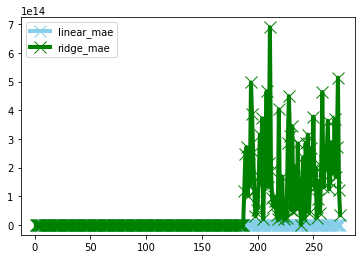

In [74]:
plt.plot('k','linear_mae', data=metricsDF, marker='x', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('k','ridge_mae', data=metricsDF, marker='x', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.legend()
plt.show()
#so we can see from here that they get about the same results, but then ridge goes crazy after maybe 180 features.

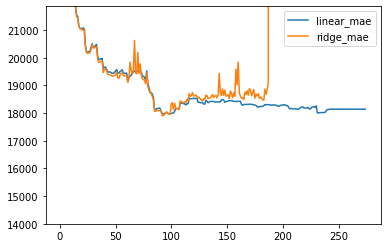

In [80]:
plt.plot('k', "linear_mae", data=metricsDF)
plt.plot('k', 'ridge_mae', data=metricsDF)
plt.ylim(14000, 21853.0013452333)
plt.legend()
plt.show()

In [82]:
metricsDF.linear_mae.min()

17967.19252207145

In [85]:
bestresult=metricsDF[metricsDF.linear_mae==metricsDF.linear_mae.min()]
bestresult

,k,linear_mae,linear_r2,ridge_mae,ridge_r2,features
97,98.0,17967.192522,0.89524,17972.006211,0.894511,0.0


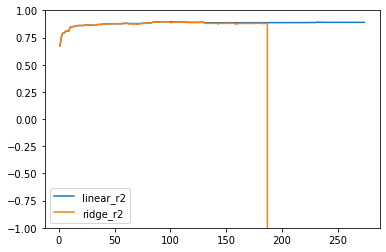

In [86]:
plt.plot('k', "linear_r2", data=metricsDF)
plt.plot('k', 'ridge_r2', data=metricsDF)
plt.ylim(-1, 1)
plt.legend()
plt.show()

# Data Dictionary 

Here's a description of the data fields:

```
1st_Flr_SF: First Floor square feet

Bedroom_AbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Bldg_Type: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
       
Bsmt_Half_Bath: Basement half bathrooms

Bsmt_Full_Bath: Basement full bathrooms

Central_Air: Central air conditioning

       N	No
       Y	Yes
		
Condition_1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition_2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
       
 Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
 Exter_Cond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 
 Exter_Qual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Exterior_1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior_2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
Full_Bath: Full bathrooms above grade

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Gr_Liv_Area: Above grade (ground) living area square feet
        
Half_Bath: Half baths above grade

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
Heating_QC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

House_Style: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Kitchen_AbvGr: Kitchens above grade

Kitchen_Qual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Land_Slope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Lot_Area: Lot size in square feet

Lot_Config: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Lot_Shape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

MS_SubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MS_Zoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Mas_Vnr_Type: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Mo_Sold: Month Sold (MM)

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Overall_Cond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Overall_Qual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

Paved_Drive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Roof_Matl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Roof_Style: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

SalePrice: the sales price for each house

Sale_Condition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Sale_Type: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
	
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
TotRms_AbvGrd: Total rooms above grade (does not include bathrooms)

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
Year_Built: Original construction date

Year_Remod/Add: Remodel date (same as construction date if no remodeling or additions)
						
Yr_Sold: Year Sold (YYYY)	

```